# The World Happiness Report Data Analysis 😊

## A. Importing, cleaning and numerical summaries


1. Download the data set data.csv from the Resources tab.
2. Import the data as a pandas DataFrame.
3. Check the number of observations.
4. Obtain the column headings.
5. Check the data type for each column.
6. Check if there are any missing values.
7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.
8. Obtain the mean, minimum and maximum value for each column containing numerical data.
9. List the 10 happiest countries.
10. List the 10 least happy countries.

***

In [129]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [130]:
#Load dataset
WHR = pd.read_csv("happiness_score_dataset.csv")

In [131]:
#Rename Column names for ease in further working with dataset.
WHR.rename(columns={ 'Economy (GDP per Capita)' : 'GDP',
 'Health (Life Expectancy)' : 'Health',  
 'Freedom to make life choices' : 'Freedom', 
 'Trust (Government Corruption)' : 'Corruption'}, inplace=True)

In [132]:
#Glimps of dataset
WHR.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [133]:
#Shape of datset (rows,columns)
WHR.shape

(158, 12)

In [134]:
print("There are {:,} rows ".format(WHR.shape[0]) + "and {} columns in our data".format(WHR.shape[1]))

There are 158 rows and 12 columns in our data


In [135]:
#Lets make column country as index.
WHR.set_index('Country', inplace=True)

In [136]:
#check dataset
WHR

,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [137]:
#Check basic insights of dataset like column names,number of rows in each column,data type of columns,memory usage.
WHR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             158 non-null    object 
 1   Happiness Rank     158 non-null    int64  
 2   Happiness Score    158 non-null    float64
 3   Standard Error     158 non-null    float64
 4   GDP                158 non-null    float64
 5   Family             158 non-null    float64
 6   Health             158 non-null    float64
 7   Freedom            158 non-null    float64
 8   Corruption         158 non-null    float64
 9   Generosity         158 non-null    float64
 10  Dystopia Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.8+ KB


In [138]:
#Check for duplicate entries
WHR.duplicated().sum()

0

In [139]:
#Statictical insights of each column.
WHR.describe()

,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [140]:
#Glimps of top 10 happiness rank holder countries. we see top 8 countries 7 are from western europe.
WHR.sort_values(by="Happiness Rank", ascending=True).head(10)

,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425


In [141]:
#Glimpse of bottom 10 countries with least happiness rank,we see majority of the countries are from sub saharan africa.
WHR.sort_values(by="Happiness Rank", ascending=False).head(10)

,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
Country,,,,,,,,,,,
Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172


***

## B. Region wise analysis

1. Use the column 'Region' to create a separate DataFrame containing the data points from each of the ten regions.
2. Compute the mean happiness score for each region and rank the regions from most happy to least happy.
3. Compute the number of countries in each region that have a happiness score above 6.0.
4. Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [142]:
WHR_Region = WHR.groupby('Region')

In [143]:
#we see statistical insights of dataset region wise.sub saharan aftrica has 40 countries in it & majority of the countries have low happiness ranking therefore its at the bottom of the below table.
WHR_Region['Happiness Score'].describe().sort_values(by="mean",ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,7.285000,0.001414,7.284,7.28450,7.285,7.28550,7.286
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253


In [144]:
# lets check for number of regions this dataset is grouped by.
WHR.Region.unique() 

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [145]:
#Lets check for India's position, its rank 117 as per this dataset with score of 4.5, Pakistan & Bangladesh is having better rank than India.
WHR[WHR["Region"]=="Southern Asia"].head()

,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
Country,,,,,,,,,,,
Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
Bangladesh,Southern Asia,109,4.694,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
Nepal,Southern Asia,121,4.514,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637


In [146]:
#Lets create datasets with entries according to region.
WHR_A = WHR[WHR['Region'] == 'Sub-Saharan Africa']
WHR_WE = WHR[WHR['Region'] == 'Western Europe']
WHR_EE = WHR[WHR['Region'] == 'Central and Eastern Europe']
WHR_LA = WHR[WHR['Region'] == 'Latin America and Caribbean']
WHR_EA = WHR[WHR['Region'] == 'Eastern Asia']
WHR_NA = WHR[WHR['Region'] == 'North America']
WHR_AN = WHR[WHR['Region'] == 'Australia and New Zealand']
WHR_ME = WHR[WHR['Region'] == 'Middle East and Northern Africa']
WHR_SEA = WHR[WHR['Region'] == 'Southeastern Asia']
WHR_SA = WHR[WHR['Region'] == 'Southern Asia']

In [147]:
#Lets check for countries with happiness score greater than 6.0, we see 44 countries with happiness score greater than 6.0
WHR_TOP=WHR[WHR['Happiness Score']>6]
WHR_TOP.shape

(44, 11)

In [148]:
#we see most happy countries are in western europe only.
print("Count of countries by respective region that have a happiness score above 6.0 ")
WHR_TOP['Region'].value_counts()

Count of countries by respective region that have a happiness score above 6.0 


Western Europe                     16
Latin America and Caribbean        13
Middle East and Northern Africa     6
Central and Eastern Europe          2
Australia and New Zealand           2
North America                       2
Southeastern Asia                   2
Eastern Asia                        1
Name: Region, dtype: int64

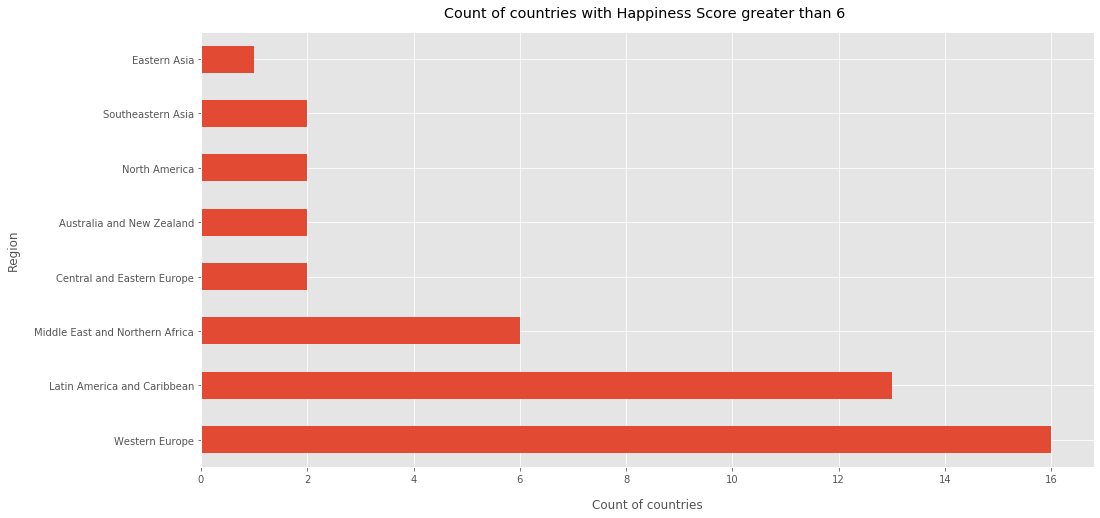

In [149]:
#Lets see the bar graph of regions with countries having happiness score greater than 6.0, total 8 regions contain countries with happiness score greater than 6.0.
WHR_TOP['Region'].value_counts().plot(kind='barh', figsize=(16, 8))
plt.xlabel("Count of countries", labelpad=14)
plt.ylabel("Region", labelpad=14)
plt.title("Count of countries with Happiness Score greater than 6 ", y=1.02);

In [150]:
# we see africa has no countries with happiness score greater than 6.0
len(WHR_A[WHR_A['Happiness Score'] > 6])

0

In [151]:
print("There are {} countries in Sub-Saharan Africa that have a happiness score above 6.0 ".format(len(WHR_A[WHR_A['Happiness Score'] > 6])))


There are 0 countries in Sub-Saharan Africa that have a happiness score above 6.0 


In [152]:
#we see western europe having maximim 16 countries with happiness score greater than 6.0.
len(WHR_WE[WHR_WE['Happiness Score'] > 6])

16

In [153]:
print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(WHR_WE[WHR_WE['Happiness Score'] > 6])))


There are 16 countries in Western Europe that have a happiness score above 6.0 


In [154]:
# Lets check for countries with happiness score greater than 6.0 in southern asia region.India is also in this region.
len(WHR_SA[WHR_SA['Happiness Score'] > 6])

0

In [155]:
print("There is {} country in Southern Asia that has a happiness score above 6.0 ".format(len(WHR_SA[WHR_SA['Happiness Score'] > 6])))


There is 0 country in Southern Asia that has a happiness score above 6.0 


In [156]:
#Lets check for range of happiness score from Max to Min region wise.
Delta_A = WHR_A.max(axis=0)['Happiness Score'] - WHR_A.min(axis=0)['Happiness Score']
Delta_WE = WHR_WE.max(axis=0)['Happiness Score'] - WHR_WE.min(axis=0)['Happiness Score']
Delta_EE = WHR_EE.max(axis=0)['Happiness Score'] - WHR_EE.min(axis=0)['Happiness Score']
Delta_LA = WHR_LA.max(axis=0)['Happiness Score'] - WHR_LA.min(axis=0)['Happiness Score']
Delta_EA = WHR_EA.max(axis=0)['Happiness Score'] - WHR_EA.min(axis=0)['Happiness Score']
Delta_NA = WHR_NA.max(axis=0)['Happiness Score'] - WHR_NA.min(axis=0)['Happiness Score']
Delta_AN = WHR_AN.max(axis=0)['Happiness Score'] - WHR_AN.min(axis=0)['Happiness Score']
Delta_ME = WHR_ME.max(axis=0)['Happiness Score'] - WHR_ME.min(axis=0)['Happiness Score']
Delta_SEA = WHR_SEA.max(axis=0)['Happiness Score'] - WHR_SEA.min(axis=0)['Happiness Score']
Delta_SA = WHR_SA.max(axis=0)['Happiness Score'] - WHR_SA.min(axis=0)['Happiness Score']
print("The region Sub-Saharan Africa has {} range of happiness scores".format(Delta_A))
print("The region Western Europe has {} range of happiness scores".format(Delta_WE))
print("The region Central and Eastern Europe has {} range of happiness scores".format(Delta_EE))
print("The region Latin America and Caribbean has {} range of happiness scores".format(Delta_LA))
print("The region Eastern Asia has {} range of happiness scores".format(Delta_EA))
print("The region North America has {} range of happiness scores".format(Delta_NA))
print("The region Australia and New Zealand has {} range of happiness scores".format(Delta_AN))
print("The region Middle East and Northern Africa has {} range of happiness scores".format(Delta_ME))
print("The region Southeastern Asia has {} range of happiness scores".format(Delta_SEA))
print("The region Southern Asia has {} range of happiness scores".format(Delta_SA))

The region Sub-Saharan Africa has 2.6380000000000003 range of happiness scores
The region Western Europe has 2.7300000000000004 range of happiness scores
The region Central and Eastern Europe has 2.287 range of happiness scores
The region Latin America and Caribbean has 2.708 range of happiness scores
The region Eastern Asia has 1.4239999999999995 range of happiness scores
The region North America has 0.3080000000000007 range of happiness scores
The region Australia and New Zealand has 0.002000000000000668 range of happiness scores
The region Middle East and Northern Africa has 4.271999999999999 range of happiness scores
The region Southeastern Asia has 2.978999999999999 range of happiness scores
The region Southern Asia has 1.677999999999999 range of happiness scores


In [157]:
Deltas = {}

In [158]:
Deltas["Sub-Saharan Africa"] = Delta_A
Deltas["Central and Eastern Europe"] = Delta_EE
Deltas["Western Europe"] = Delta_WE
Deltas["Southern Asia"] = Delta_SA
Deltas["Latin America and Caribbean"] = Delta_LA
Deltas["Southeastern Asia"] = Delta_SEA
Deltas["Middle East and Northern Africa"] = Delta_ME
Deltas["Australia and New Zealand"] = Delta_AN
Deltas["North America"] = Delta_NA
Deltas["Eastern Asia"] = Delta_EA

In [159]:
#we focus on the region with maximum difference in hapiness score.
print("The {} region seems to have the largest range of happiness scores".format(max(Deltas, key=Deltas.get)))

The Middle East and Northern Africa region seems to have the largest range of happiness scores


In [160]:
#Now lets check the Middle East region data, we see there are countries like Israel, UAE, Oman, Qatar with happiness score as high as 7.2 and this region also contains countries like Syria & Yemen with hapiness score as low as 3.0 (coz of civil unrest and war going on in these countries)
WHR_ME

,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
Country,,,,,,,,,,,
Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
Oman,Middle East and Northern Africa,22,6.853,0.05335,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542,2.47489
Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
Saudi Arabia,Middle East and Northern Africa,35,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872
Kuwait,Middle East and Northern Africa,39,6.295,0.04456,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,1.87634
Bahrain,Middle East and Northern Africa,49,5.960,0.05412,1.32376,1.21624,0.74716,0.45492,0.30600,0.17362,1.73797
Libya,Middle East and Northern Africa,63,5.754,0.07832,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295,2.09066
Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209


***

## C. Bar plot of the Happiness Score
<a id="plot" > 

1. Horizontal bar plot of the Happiness Score of the top 10 countries.

2.  Stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns:
  * Economy
  * Family
  * Health
  * Freedom
  * Generosity
  * Corruption
  * Dystopia  
  

Text(0.5, 1.0, 'Happiness Score of the top 10 Countries')

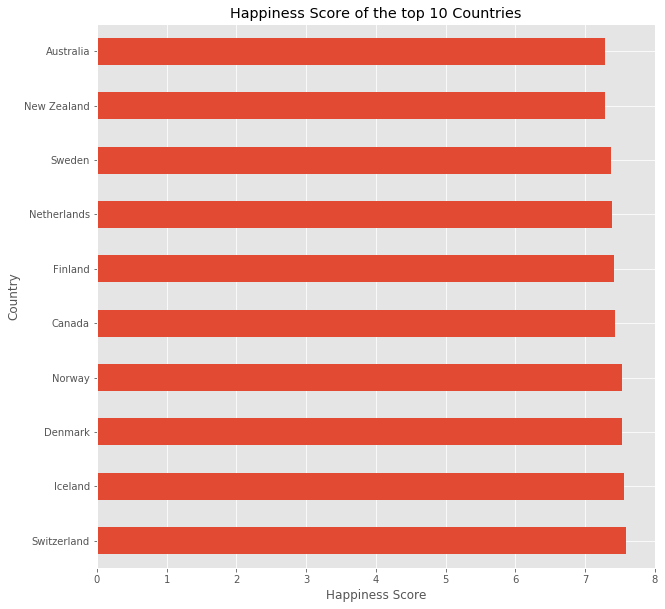

In [161]:
#We see Switzerland is the most happy country.
WHR['Happiness Score'].head(10).plot(xticks=np.arange(9), kind='barh', figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')

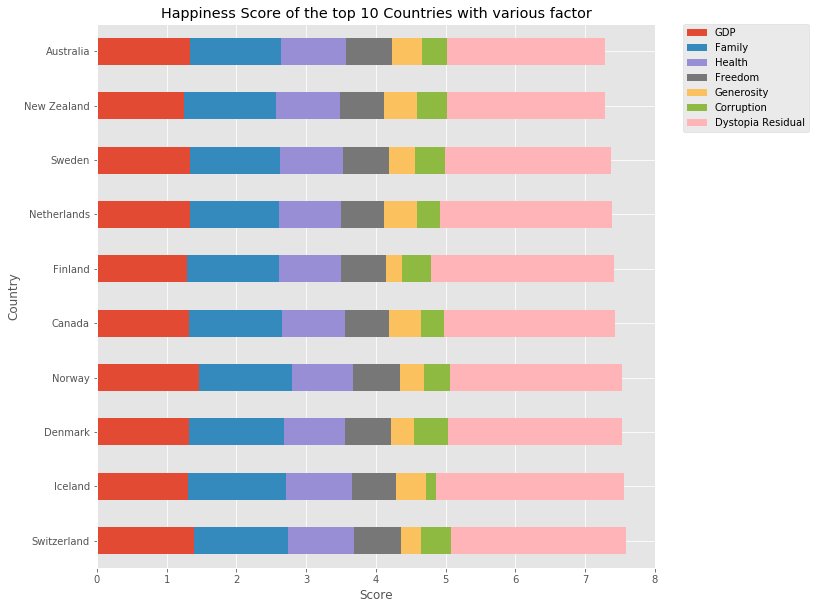

In [162]:
#Lets see the visualisation of varios factors that affect the hapiness score for top 10 countries.
WHR[['GDP', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))
plt.xlabel("Score")
plt.title('Happiness Score of the top 10 Countries with various factor')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

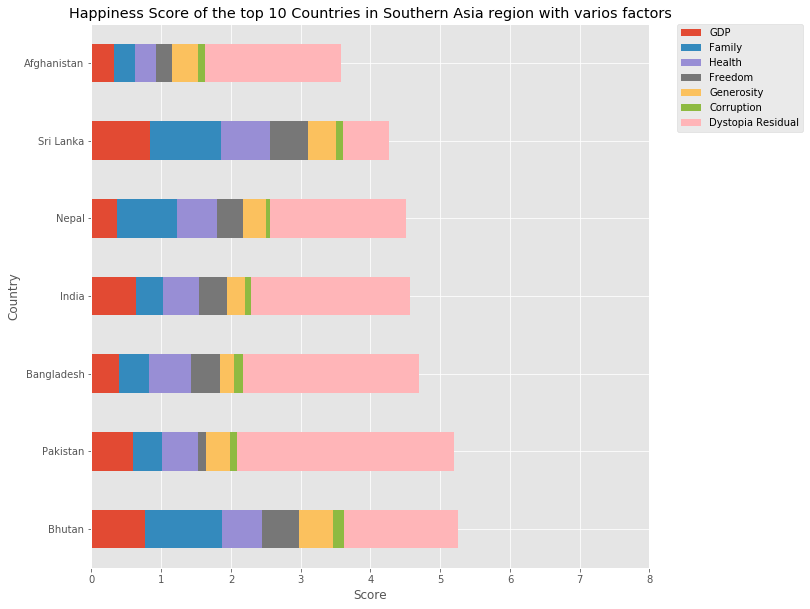

In [163]:
#Lets see the visualisation of varios factors that affect the hapiness score for top 10 countries in Southern Asia region.
WHR_SA[['GDP', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))
plt.xlabel("Score")
plt.title('Happiness Score of the top 10 Countries in Southern Asia region with varios factors')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

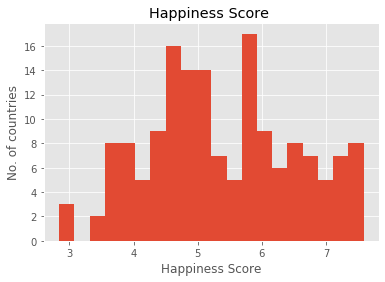

In [164]:
#Lets see the number of countries with frequency of score.
plt.hist(WHR['Happiness Score'], bins = 20)
plt.xlabel("Happiness Score")
plt.title('Happiness Score ')
plt.ylabel("No. of countries")
plt.style.use('ggplot')
plt.show()

***

## D. More analysis
 

More analysis:
Finding out attributes which are highly correlated to each other through heatmap.

In [165]:
#Lets see the countries with top scorers in every category.
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
WHR.style.apply(highlight_max, subset=[ 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'GDP', 'Family',
       'Health', 'Freedom', 'Corruption',
       'Generosity', 'Dystopia Residual'])

,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587000,0.034110,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
Iceland,Western Europe,2,7.561000,0.048840,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
Denmark,Western Europe,3,7.527000,0.033280,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
Norway,Western Europe,4,7.522000,0.038800,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
Canada,North America,5,7.427000,0.035530,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
Finland,Western Europe,6,7.406000,0.031400,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550
Netherlands,Western Europe,7,7.378000,0.027990,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700
Sweden,Western Europe,8,7.364000,0.031570,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190
New Zealand,Australia and New Zealand,9,7.286000,0.033710,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250


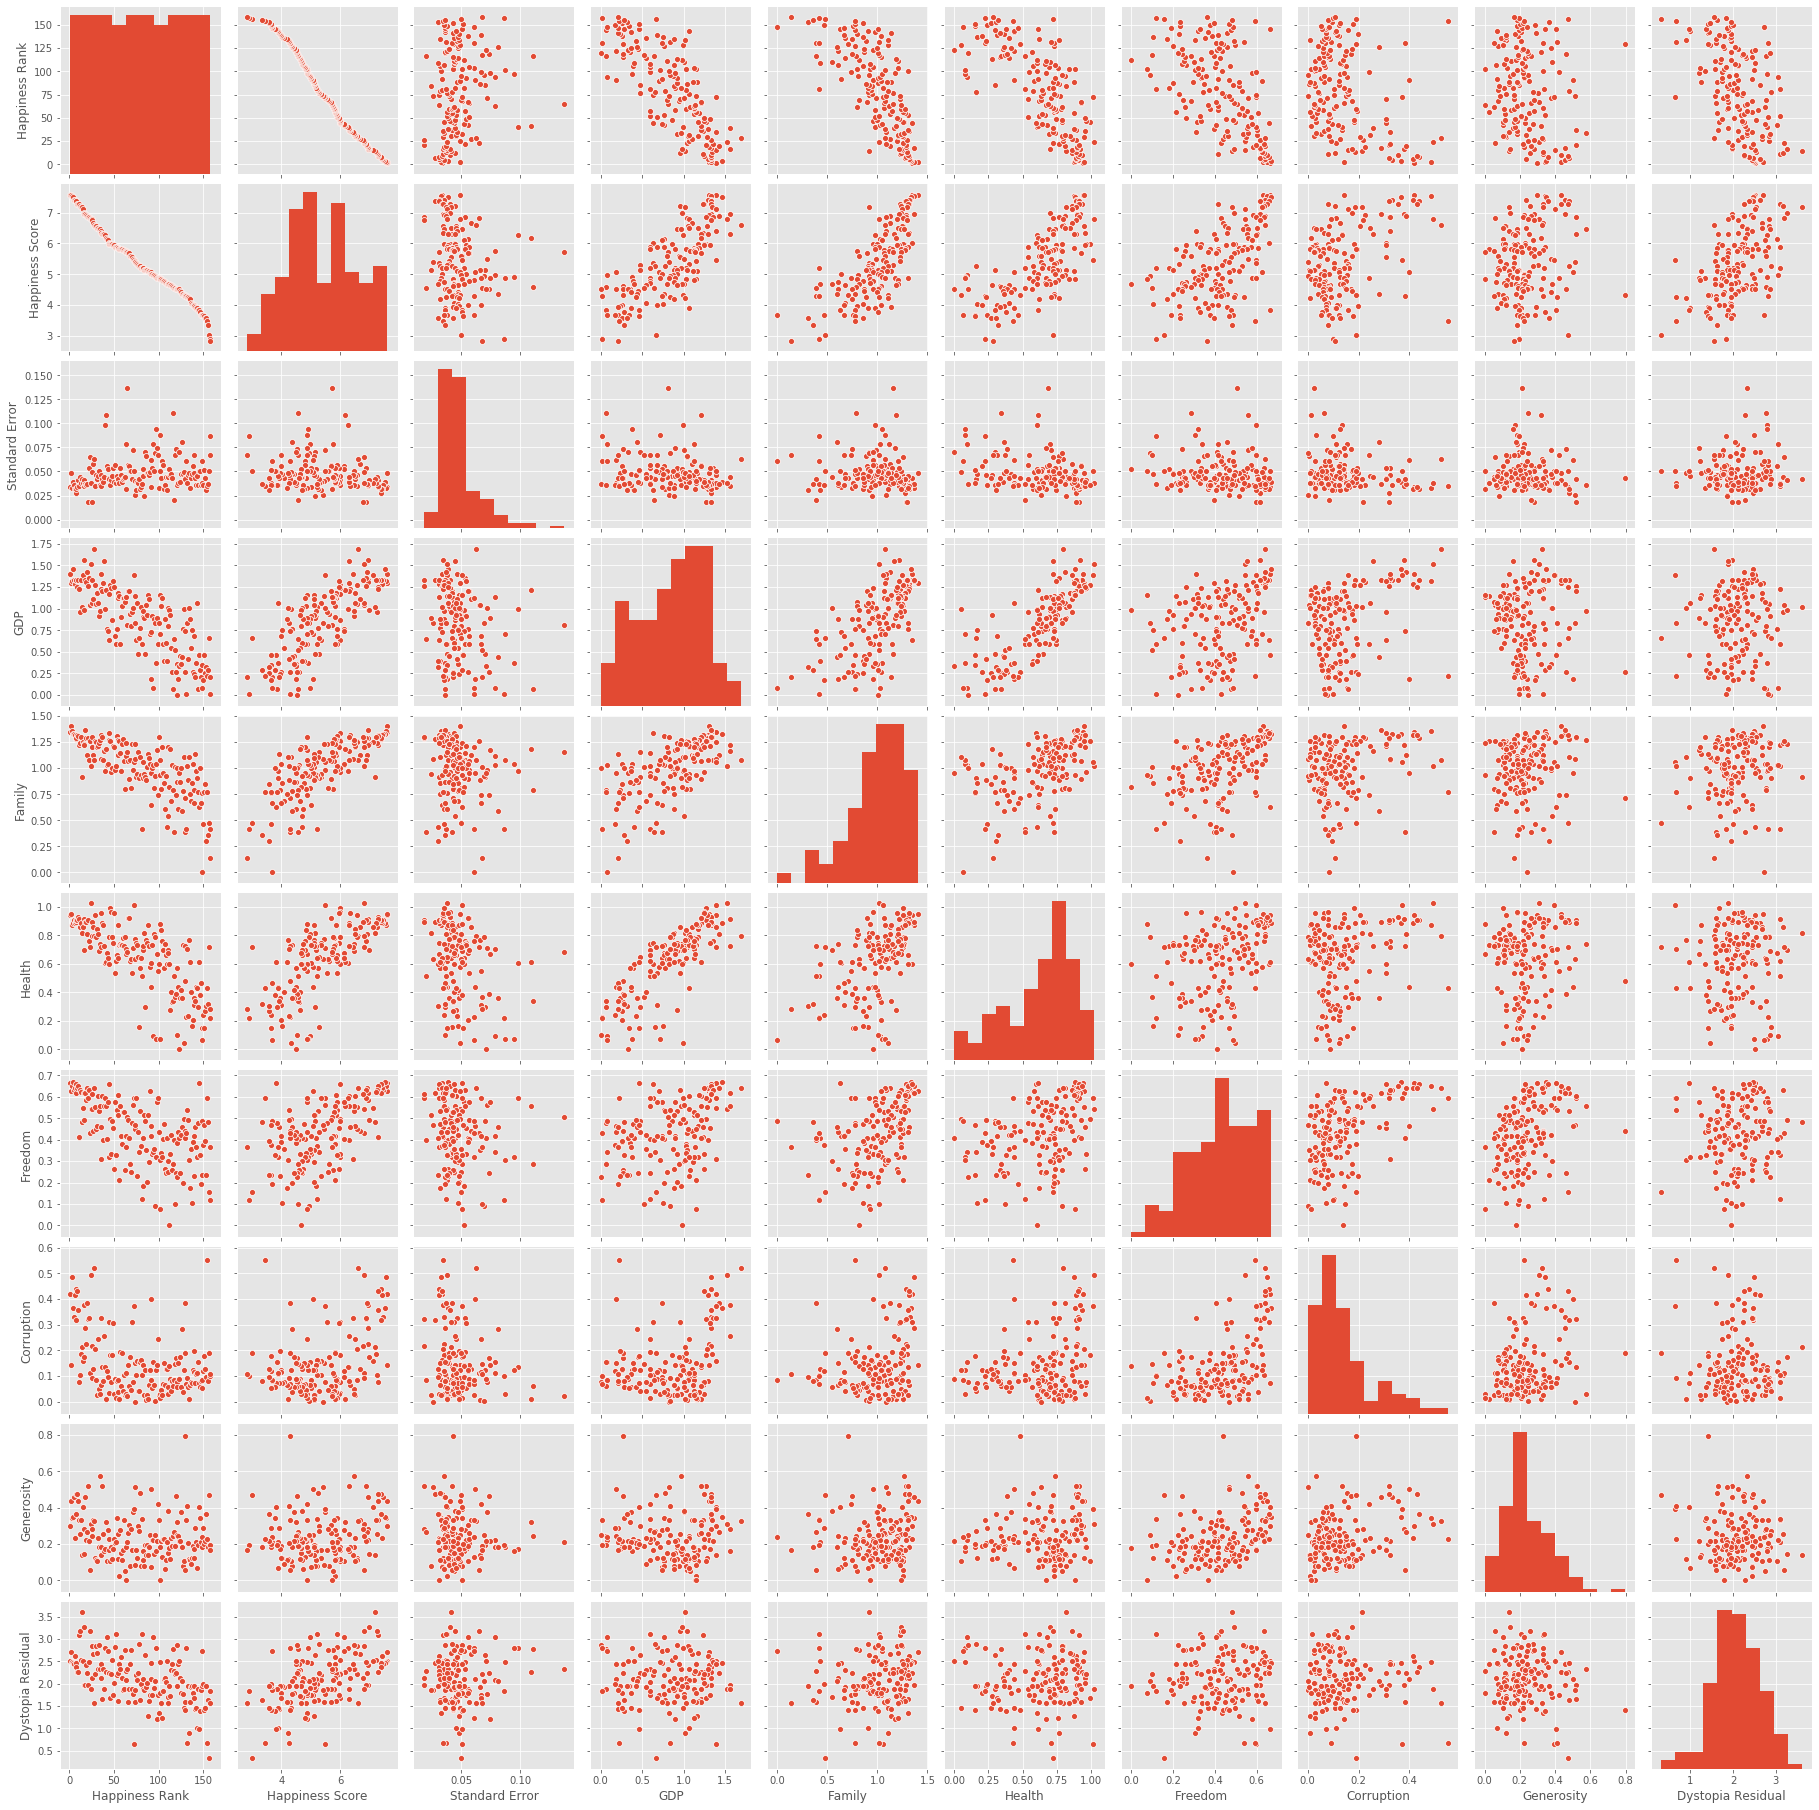

In [166]:
sns.pairplot(WHR)
#Plotting pairwise relationships in the dataset.

In [167]:
WHR=WHR.reset_index()

In [168]:
WHR

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


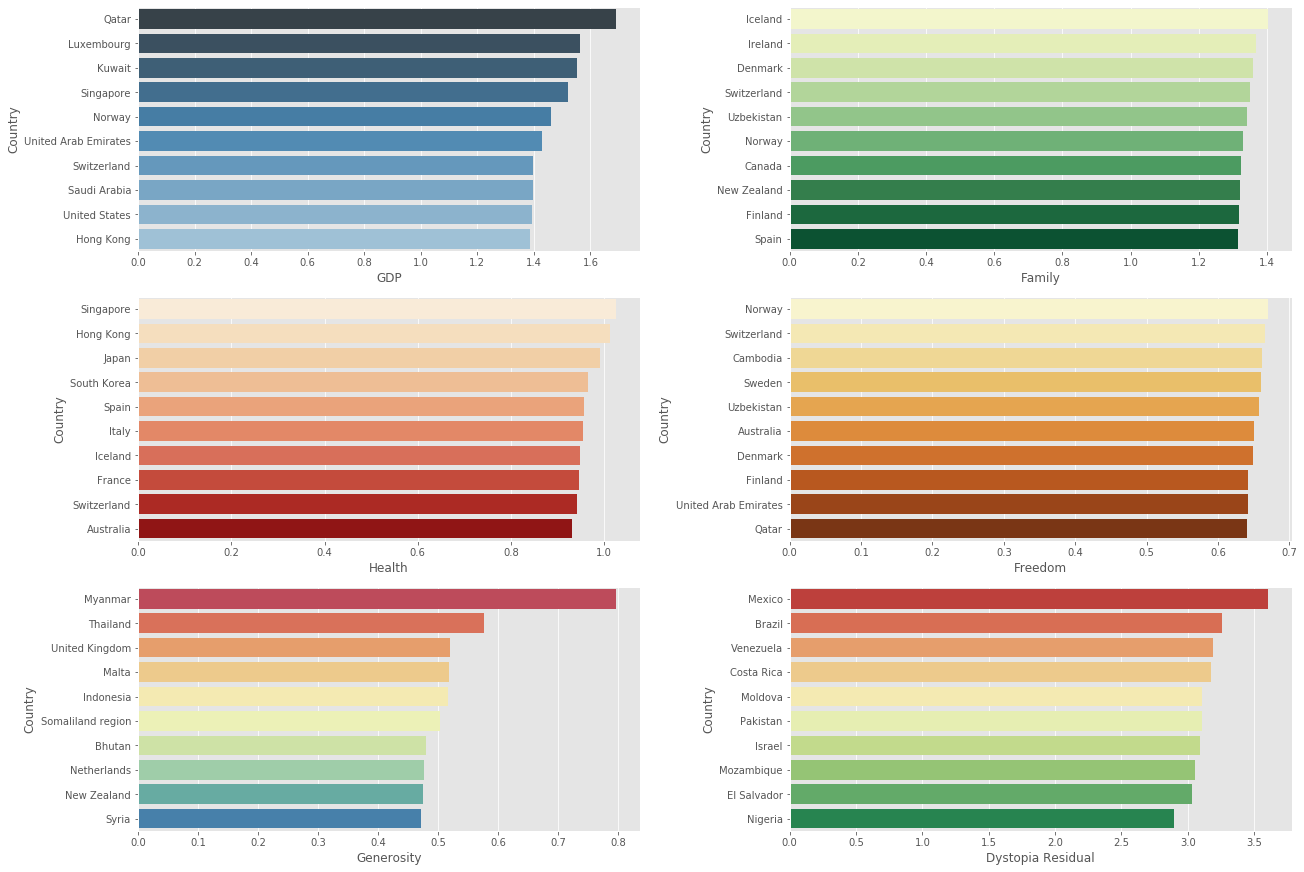

In [169]:
#Top 10 countries for each attribute.
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(18,12))

sns.barplot(x='GDP',y='Country',data=WHR.nlargest(10,'GDP'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Family' ,y='Country',data=WHR.nlargest(10,'Family'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Health' ,y='Country',data=WHR.nlargest(10,'Health'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom' ,y='Country',data=WHR.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')

sns.barplot(x='Generosity' ,y='Country',data=WHR.nlargest(10,'Generosity'),ax=axes[2,0],palette='Spectral')

sns.barplot(x='Dystopia Residual' ,y='Country',data=WHR.nlargest(10,'Dystopia Residual'),ax=axes[2,1],palette='RdYlGn')

In [170]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = WHR['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = WHR['Happiness Score'], 
           text = WHR['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

***

## E. Pairwise Scatter plots
<a id="scat" > 

Scatter plots of the Happiness Score versus each of the other variables.

In [171]:
WHR=WHR.set_index('Country')
WHR

,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



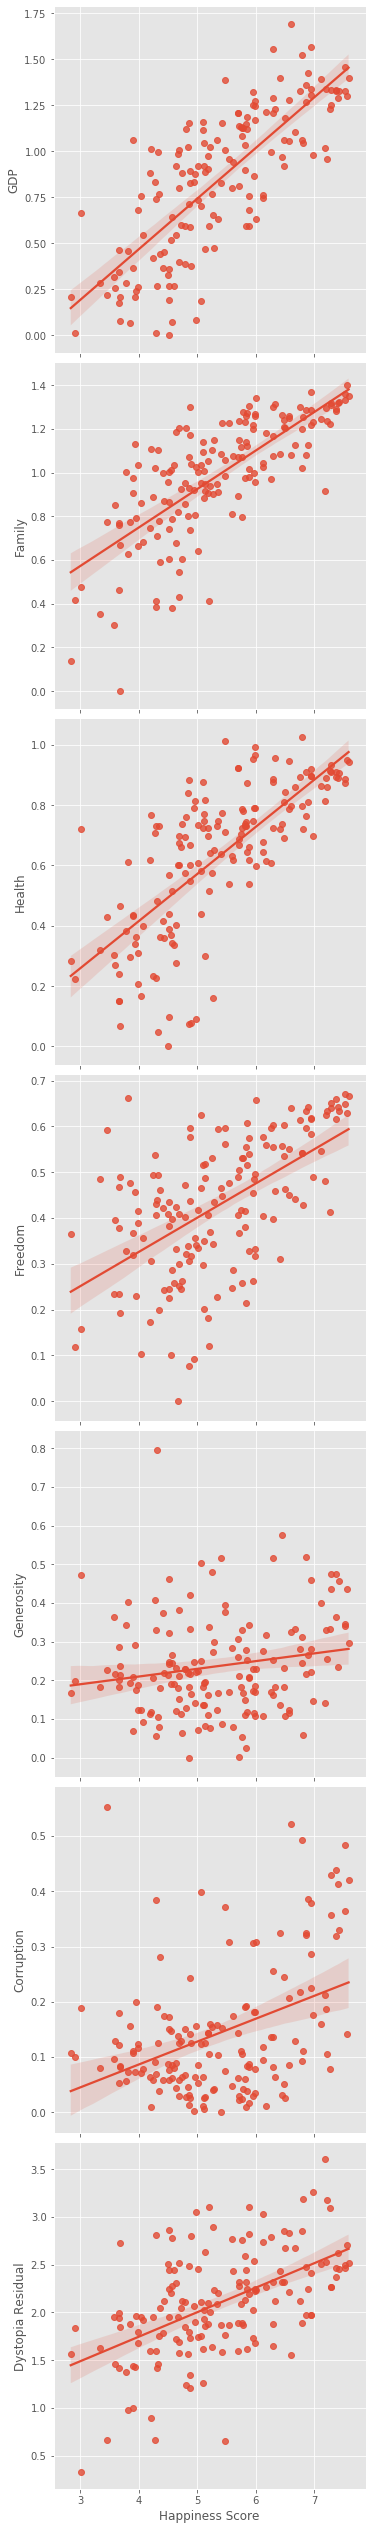

In [172]:
sns.pairplot(data=WHR, kind='reg', size = 5,
                  x_vars=['Happiness Score'],
                  y_vars=['GDP', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia Residual'])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



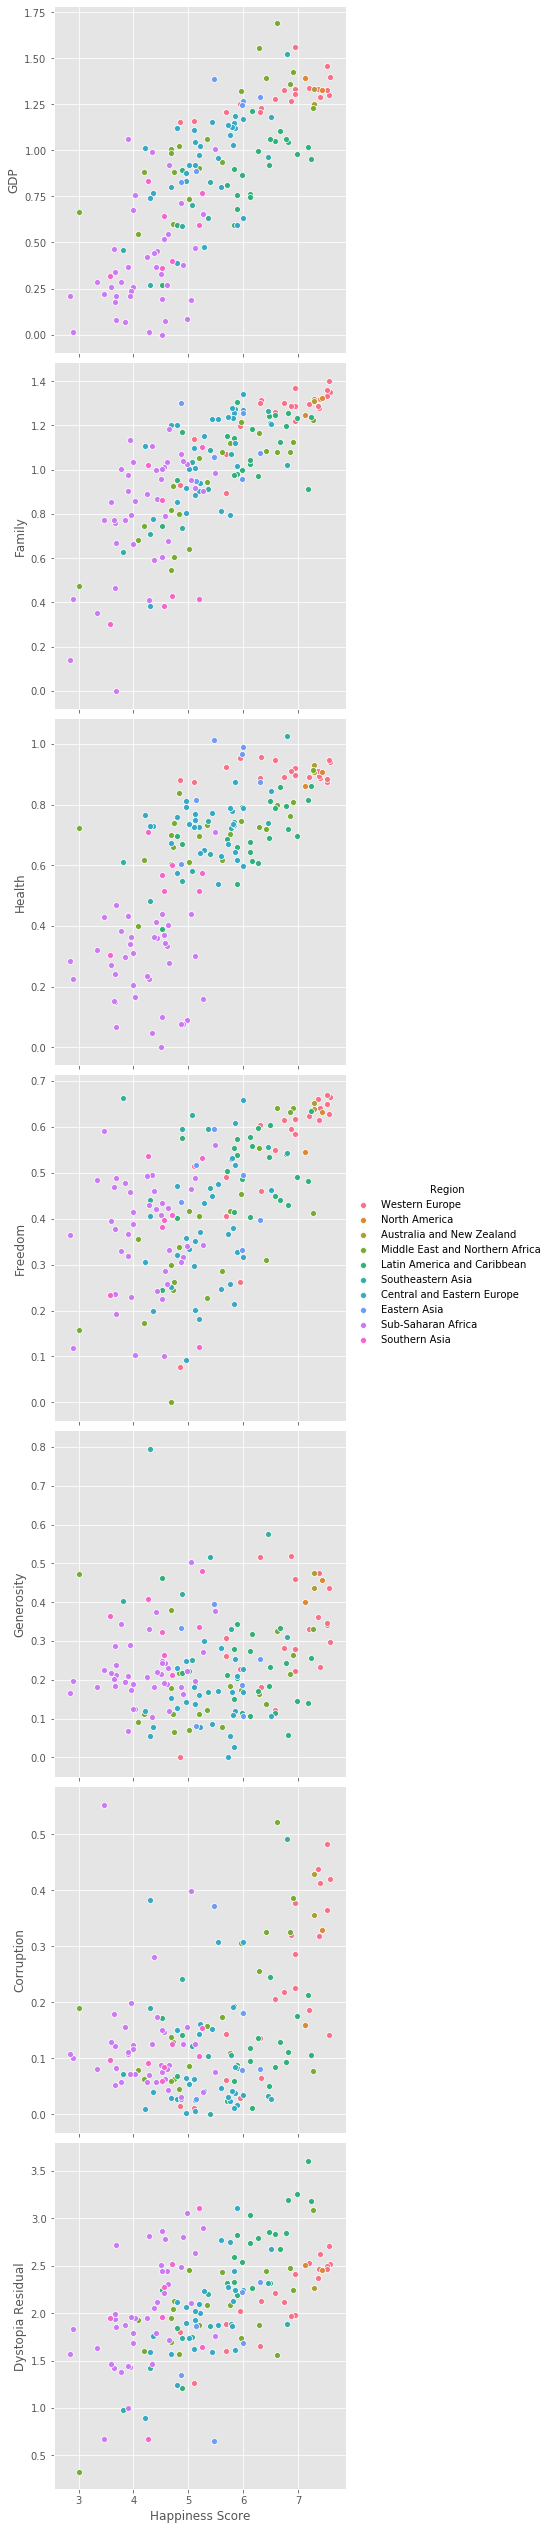

In [173]:
#Region wise scatter plot of happiness score w.r.t various happiness score affecting factors.
sns.pairplot(data=WHR, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['GDP', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia Residual'])

***

## F. Correlation
<a id="corr" > 

Correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?

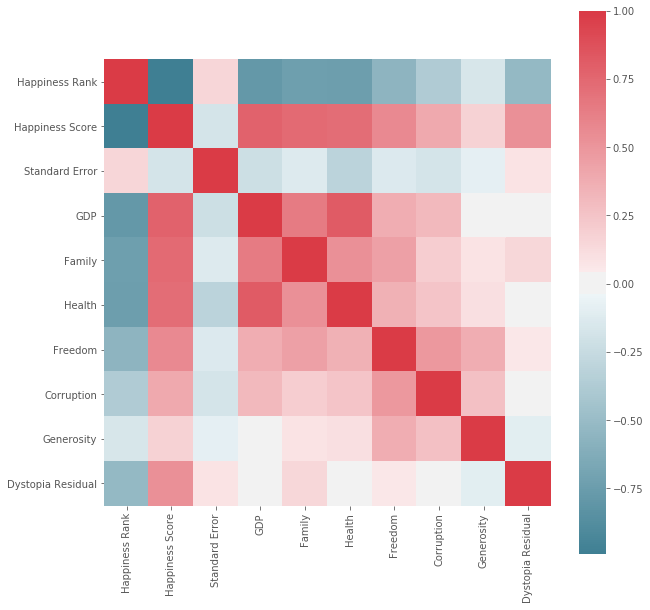

In [174]:
corr = WHR.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [175]:
WHR.corr()

,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
GDP,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Corruption,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [176]:
WHR.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)

Happiness Score      1.000000
GDP                  0.780966
Family               0.740605
Health               0.724200
Freedom              0.568211
Dystopia Residual    0.530474
Corruption           0.395199
Generosity           0.180319
Standard Error      -0.177254
Happiness Rank      -0.992105
Name: Happiness Score, dtype: float64

In [177]:
WHR.corr(method="pearson", min_periods=20)["Happiness Score"].abs().sort_values(ascending=False)

Happiness Score      1.000000
Happiness Rank       0.992105
GDP                  0.780966
Family               0.740605
Health               0.724200
Freedom              0.568211
Dystopia Residual    0.530474
Corruption           0.395199
Generosity           0.180319
Standard Error       0.177254
Name: Happiness Score, dtype: float64

If we ignore the Happiness Rank, GDP seems to have the highest correlation with the Happiness Score.

***

## G. Probabilities
<a id="prob" > 

Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. 

In [178]:
WHR[WHR['Happiness Score'] > 6].shape[0]

44

In [179]:
float(len(WHR[(WHR['Happiness Score'] > 6) & (WHR['Region'] == 'Western Europe')]))/float(len(WHR[WHR['Happiness Score'] > 6]))

0.36363636363636365

In [180]:
print("The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is {0:.0%}".format(float(WHR[(WHR['Happiness Score'] > 6) & (WHR['Region'] == 'Western Europe')].shape[0])/float(WHR[WHR['Happiness Score'] > 6].shape[0])))

The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is 36%


***

# Cluster analysis

In the original data, the happiness factors such as Economy, Family, etc. sum up to the happiness Score. Consequently, a countries with high happiness score also tend to have high factors. To analyze how the influence of economy on happiness varies between countries, we first normalize the factors using the total happiness score.

In [181]:
happiness_factors = ['GDP', 'Family', 'Health', 
           'Freedom', 'Generosity', 'Corruption', 
           'Dystopia Residual']

WHR_norm = WHR
WHR_norm[happiness_factors] = WHR_norm[happiness_factors].div(WHR['Happiness Score'].values, axis=0)

In [182]:
from sklearn.cluster import KMeans
cluster_n = 3
k_means = KMeans(init='k-means++', n_clusters=cluster_n, n_init=10)
cluster_labels = k_means.fit_predict(WHR_norm[happiness_factors[:-1]])

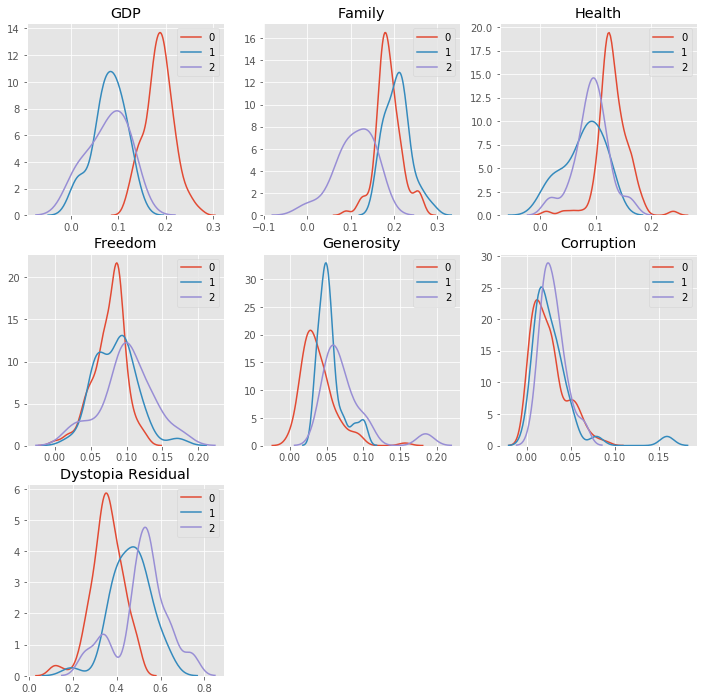

In [183]:
#Plot distributions of the factors for each cluster:
plt.figure(figsize=(12,12))
for i, factor in enumerate(happiness_factors):
    ax = plt.subplot(3, 3, i+1)
    for cluster in range(cluster_n):
        sns.kdeplot(WHR_norm.loc[cluster_labels == cluster, factor], label=cluster)
        ax.set_title(factor)

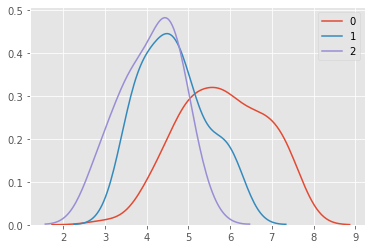

In [184]:
#Compare happiness score distribution for the clusters:
for cluster in range(cluster_n):
    sns.kdeplot(WHR.loc[cluster_labels == cluster, 'Happiness Score'], label=cluster)

In [185]:
#There is a big difference between the happiness score distributions of the clusters.
WHR['Cluster'] = cluster_labels

In [186]:
WHR=WHR.reset_index()

In [187]:
data = dict(type = 'choropleth', 
           locations = WHR['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = WHR['Cluster'], 
           text = WHR['Country'],
           colorbar = {'title':'Three Happiness Score clusters (0,1 & 2)'})

layout = dict(title = 'Geographical Visualization of Happiness Score clusters', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

This map visualizes coutries clustered by the factors contributing to happiness.

Grey colored countries are not part of the analysis.
We can see three clusters of countries marked with 
    deep red-0(High happiness score countries) ,
    deep green-2(Low happiness score countries) and 
    light brown-1(Medium happiness score countries)
India is in Light brown cluster i.e with medium happiness score.

***